In [1]:
import numpy as np
import pandas as pd

D:\rgzn\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_ = pd.read_csv('knn_data.csv')
data_

,影片类型,打斗次数,亲吻次数
0,爱情片,3,199
1,爱情片,2,132
2,爱情片,5,87
3,动作片,65,12
4,动作片,114,14
5,动作片,127,3


In [3]:
A = np.array(data_.iloc[:,1:3])
B = np.array(data_.iloc[:,0])

In [4]:
T = np.array([[25,100],[85,23]])

In [5]:
def predict(A,B,T,k =3, p =2):
    n_lp = [np.sum(np.abs(t - A) ** p,axis = 1) ** (1/p) for t in T]
    n_idx = np.argsort(n_lp, axis = 1)[:,:k]
    lbl = np.unique(B)
    prob = np.array([[n[n==v].size/n.size for v in lbl] for n in B[n_idx]])
    return lbl[prob.argmax(axis = 1)]

In [6]:
from sklearn.datasets import load_iris 
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.25,random_state=33)

In [8]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(X_train,y_train)
y_predict = KNC.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
print('KNN算法的精确率为:',KNC.score(X_test,y_test))
print(classification_report(y_predict,y_test,target_names=iris.target_names))

KNN算法的精确率为: 0.8947368421052632
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.73      0.85        15
   virginica       0.79      1.00      0.88        15

    accuracy                           0.89        38
   macro avg       0.93      0.91      0.91        38
weighted avg       0.92      0.89      0.89        38






# 开始调用自己的时间去预测事故发生事件




In [72]:
df = pd.read_excel('数据挖掘数据.xlsx')

In [73]:
df.head()

,事故编号,曝光数,报警日期,报警时间,事故类型,事件描述,估计财产损失,估计内容损失,区,城市段,...,街道编号,街道前缀,街道名称,街道后缀,街道类型,地址2,XStreet前缀,XStreet名称,XStreet后缀,XStreet类型
0,20-0022468,0,1,00:00:15,2,Carbon monoxide incident ...,0,0,4,BO,...,433,,HARRISON,NaN,AVE,,,,,
1,20-0020460,0,1,00:00:28,1,"Cooking fire, confined to container ...",0,0,9,RX,...,44239,,SMITH,,ST,,,,,
2,20-0026742,0,1,00:00:29,1,"Cooking fire, confined to container ...",0,0,9,RX,...,44386,,DELLE,,AVE,: #CLM839,,,,
3,20-0017044,0,1,00:00:39,2,Public service ...,0,0,3,BO,...,101,,CAMBRIDGE,,ST,: @MBTA STA-BOWDOIN,,,,
4,20-0022008,0,1,00:00:48,2,Gas leak (natural gas or LPG) ...,0,0,8,DO,...,205,,FAIRMOUNT,,ST,,,,,


In [74]:
df = df.drop(['事故编号','街道编号','XStreet前缀','XStreet名称','XStreet类型','XStreet后缀'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93310 entries, 0 to 93309
Data columns (total 18 columns):
曝光数       93310 non-null int64
报警日期      93310 non-null int64
报警时间      93310 non-null object
事故类型      93310 non-null int64
事件描述      93310 non-null object
估计财产损失    93310 non-null int64
估计内容损失    93310 non-null int64
区         93310 non-null object
城市段       93310 non-null object
邻域        92279 non-null object
拉链        93310 non-null int64
财产使用      93310 non-null object
属性描述      86213 non-null object
街道前缀      93309 non-null object
街道名称      93310 non-null object
街道后缀      93306 non-null object
街道类型      93310 non-null object
地址2       93310 non-null object
dtypes: int64(6), object(12)
memory usage: 12.8+ MB


In [75]:
df.isnull().sum()

曝光数          0
报警日期         0
报警时间         0
事故类型         0
事件描述         0
估计财产损失       0
估计内容损失       0
区            0
城市段          0
邻域        1031
拉链           0
财产使用         0
属性描述      7097
街道前缀         1
街道名称         0
街道后缀         4
街道类型         0
地址2          0
dtype: int64

In [76]:
df = df.drop(['属性描述'],axis=1)
df.dropna(how='any',inplace=True)
df.isnull().sum()

曝光数       0
报警日期      0
报警时间      0
事故类型      0
事件描述      0
估计财产损失    0
估计内容损失    0
区         0
城市段       0
邻域        0
拉链        0
财产使用      0
街道前缀      0
街道名称      0
街道后缀      0
街道类型      0
地址2       0
dtype: int64

In [77]:
df['地址2']

1                                                
2        : #CLM839                               
3        : @MBTA STA-BOWDOIN                     
4                                                
5                                                
                           ...                   
93305                                            
93306    : #WYN4079                              
93307    : #12-2391                              
93308                                            
93309    : @BFD HEADQUARTERS                     
Name: 地址2, Length: 92274, dtype: object

In [78]:
df = df.drop(['地址2'],axis=1)

In [79]:
df['街道后缀']

1          
2          
3          
4          
5          
         ..
93305      
93306      
93307      
93308      
93309      
Name: 街道后缀, Length: 92274, dtype: object

In [80]:
df = df.drop(['街道后缀'],axis=1)

In [81]:
df = df.drop(['街道前缀'],axis=1)

In [82]:
df = df.drop(['报警时间'],axis=1)

In [83]:
df.head()

,曝光数,报警日期,事故类型,事件描述,估计财产损失,估计内容损失,区,城市段,邻域,拉链,财产使用,街道名称,街道类型
1,0,1,1,"Cooking fire, confined to container ...",0,0,9,RX,Roxbury ...,2120,429,SMITH,ST
2,0,1,1,"Cooking fire, confined to container ...",0,0,9,RX,Roxbury ...,2120,429,DELLE,AVE
3,0,1,2,Public service ...,0,0,3,BO,Boston ...,2114,170,CAMBRIDGE,ST
4,0,1,2,Gas leak (natural gas or LPG) ...,0,0,8,DO,Dorchester ...,2124,962,FAIRMOUNT,ST
5,0,1,3,"Smoke detector activation, no fire - unintenti...",0,0,9,RX,Roxbury ...,2121,400,SEAVER,ST


In [84]:
df['街道类型'].value_counts()

ST      57124
AVE     18493
RD       6472
         1467
WAY      1317
BLVD     1302
PL        865
DR        864
CT        671
SQ        648
PKWY      628
HWY       578
PARK      445
TER       419
CIR       268
PLZ       198
LN        158
WHRF       90
ROW        57
SKWY       43
MALL       41
CIRT       24
TPKE       23
BCH        15
GRN        13
ALY        11
CTR         9
CRES        6
BRG         6
WY          5
DM          3
EXT         3
VW          2
PK          1
TR          1
PATH        1
RAMP        1
AV          1
DRWY        1
Name: 街道类型, dtype: int64

In [85]:
df['城市段'].value_counts()

BO                 25412
DO                 15643
RX                 13787
BR                  7682
SB                  6367
JP                  5091
EB                  4184
WR                  3246
MT                  3068
HP                  3054
RS                  2439
CH                  2299
HI                     2
Name: 城市段, dtype: int64

In [86]:
df['邻域'].value_counts()

Boston                                                25412
Dorchester                                            15643
Roxbury                                               13787
Allston-Brighton                                       7682
South Boston                                           6367
Jamaica Plain                                          5091
East Boston                                            4184
West Roxbury                                           3246
Mattapan                                               3068
Hyde Park                                              3054
Roslindale                                             2439
Charlestown                                            2299
Harbor Islands                                            2
Name: 邻域, dtype: int64

In [87]:
df.describe()

,曝光数,报警日期,事故类型,估计财产损失,估计内容损失,拉链
count,92274.0,92274.000000,92274.000000,9.227400e+04,92274.000000,92274.000000
mean,0.0,2.498114,2.646184,6.023408e+02,112.307844,2127.955545
std,0.0,1.079392,0.983398,1.794507e+04,3518.122051,63.205028
min,0.0,1.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,0.0,2.000000,2.000000,0.000000e+00,0.000000,2118.000000
50%,0.0,2.000000,2.000000,0.000000e+00,0.000000,2124.000000
75%,0.0,3.000000,3.000000,0.000000e+00,0.000000,2130.000000
max,0.0,4.000000,5.000000,2.000000e+06,500000.000000,2467.000000


In [88]:
df = df.drop(['曝光数'],axis=1)

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
df.loc[df['估计内容损失'] == 0]['估计内容损失'].count()

90914

In [91]:
df.loc[df['估计财产损失'] == 0]['估计财产损失'].count()

90833

In [92]:
df.loc[df['估计内容损失'] > 112]['估计内容损失'].describe()

count       891.000000
mean      11612.310887
std       33904.939424
min         150.000000
25%         750.000000
50%        1000.000000
75%        5000.000000
max      500000.000000
Name: 估计内容损失, dtype: float64

In [93]:
df = df.loc[(df['估计内容损失'] <= 5000) & (df['估计内容损失'] >= 0)]

In [94]:
df.describe()

,报警日期,事故类型,估计财产损失,估计内容损失,拉链
count,92056.000000,92056.000000,9.205600e+04,92056.000000,92056.000000
mean,2.498001,2.650072,2.021177e+02,11.887807,2127.949878
std,1.079229,0.981302,9.834513e+03,190.175302,63.263626
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,2.000000,2.000000,0.000000e+00,0.000000,2118.000000
50%,2.000000,2.000000,0.000000e+00,0.000000,2124.000000
75%,3.000000,3.000000,0.000000e+00,0.000000,2130.000000
max,4.000000,5.000000,2.000000e+06,5000.000000,2467.000000


In [95]:
data = df

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92056 entries, 1 to 93309
Data columns (total 12 columns):
报警日期      92056 non-null int64
事故类型      92056 non-null int64
事件描述      92056 non-null object
估计财产损失    92056 non-null int64
估计内容损失    92056 non-null int64
区         92056 non-null object
城市段       92056 non-null object
邻域        92056 non-null object
拉链        92056 non-null int64
财产使用      92056 non-null object
街道名称      92056 non-null object
街道类型      92056 non-null object
dtypes: int64(5), object(7)
memory usage: 9.1+ MB


In [97]:
data1 = data.copy()

In [98]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92056 entries, 1 to 93309
Data columns (total 12 columns):
报警日期      92056 non-null int64
事故类型      92056 non-null int64
事件描述      92056 non-null object
估计财产损失    92056 non-null int64
估计内容损失    92056 non-null int64
区         92056 non-null object
城市段       92056 non-null object
邻域        92056 non-null object
拉链        92056 non-null int64
财产使用      92056 non-null object
街道名称      92056 non-null object
街道类型      92056 non-null object
dtypes: int64(5), object(7)
memory usage: 9.1+ MB


In [99]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
 
le = LabelEncoder()
data['事件描述'] = le.fit_transform(data['事件描述'])
data['城市段'] = le.fit_transform(data['城市段'])
data['邻域'] = le.fit_transform(data['邻域'])
data['街道类型'] = le.fit_transform(data['街道类型'])

In [100]:
data.head()

,报警日期,事故类型,事件描述,估计财产损失,估计内容损失,区,城市段,邻域,拉链,财产使用,街道名称,街道类型
1,1,1,34,0,0,9,10,10,2120,429,SMITH,31
2,1,1,34,0,0,9,10,10,2120,429,DELLE,3
3,1,2,99,0,0,3,0,1,2114,170,CAMBRIDGE,31
4,1,2,63,0,0,8,3,3,2124,962,FAIRMOUNT,31
5,1,3,112,0,0,9,10,10,2121,400,SEAVER,31


In [101]:
data['街道名称'].value_counts()

WASHINGTON                   3938
MASSACHUSETTS                2361
COMMONWEALTH                 1972
DORCHESTER                   1616
CENTRE                       1492
                             ... 
MARTIN LUTHER                   1
TUCKER                          1
ROXSE                           1
MENDELL                         1
MINDORO                         1
Name: 街道名称, Length: 3067, dtype: int64

In [102]:
def ycz(x):
    try:
        x = str(x)
        x = x.strip(' ')
        return x
    except:
        return np.nan

data['街道名称'] = data['街道名称'].apply(ycz)
data['街道名称'] = le.fit_transform(data['街道名称'])

In [103]:
data.head()

,报警日期,事故类型,事件描述,估计财产损失,估计内容损失,区,城市段,邻域,拉链,财产使用,街道名称,街道类型
1,1,1,34,0,0,9,10,10,2120,429,2586,31
2,1,1,34,0,0,9,10,10,2120,429,793,3
3,1,2,99,0,0,3,0,1,2114,170,459,31
4,1,2,63,0,0,8,3,3,2124,962,1001,31
5,1,3,112,0,0,9,10,10,2121,400,2533,31


In [104]:
def ycz2(x):
    try:
        x = int(x)
        return x
    except:
        return np.nan

data['区'] = data['区'].apply(ycz2)
data['区'] = le.fit_transform(data['区'])
data['财产使用'] = data['财产使用'].apply(ycz2)
data['财产使用'] = le.fit_transform(data['财产使用'])

In [105]:
data.head()

,报警日期,事故类型,事件描述,估计财产损失,估计内容损失,区,城市段,邻域,拉链,财产使用,街道名称,街道类型
1,1,1,34,0,0,6,10,10,2120,64,2586,31
2,1,1,34,0,0,6,10,10,2120,64,793,3
3,1,2,99,0,0,1,0,1,2114,30,459,31
4,1,2,63,0,0,5,3,3,2124,134,1001,31
5,1,3,112,0,0,6,10,10,2121,62,2533,31


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92056 entries, 1 to 93309
Data columns (total 12 columns):
报警日期      92056 non-null int64
事故类型      92056 non-null int64
事件描述      92056 non-null int32
估计财产损失    92056 non-null int64
估计内容损失    92056 non-null int64
区         92056 non-null int64
城市段       92056 non-null int32
邻域        92056 non-null int32
拉链        92056 non-null int64
财产使用      92056 non-null int64
街道名称      92056 non-null int32
街道类型      92056 non-null int32
dtypes: int32(5), int64(7)
memory usage: 7.4 MB


Text(0.5, 1.0, '事故与其他特征热力图')

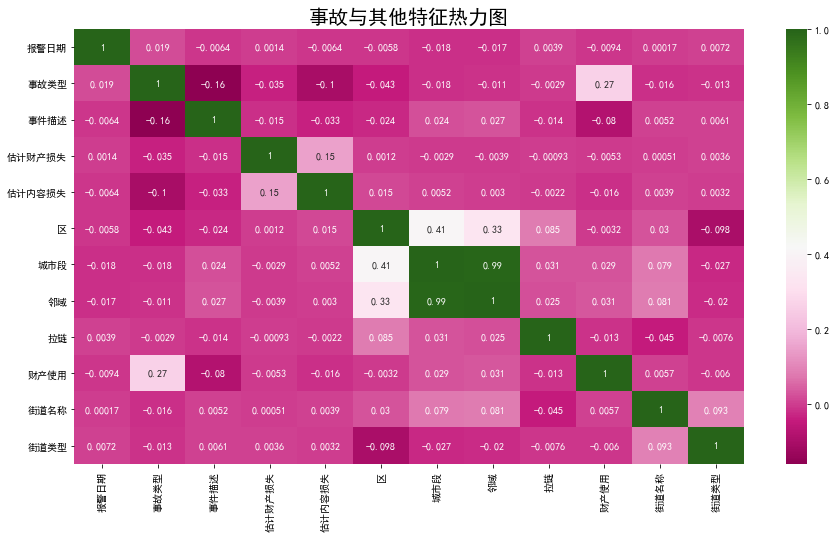

In [107]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplots(figsize = (15,8))
sns.heatmap(data.corr(), annot=True,cmap="PiYG")
plt.title("事故与其他特征热力图", fontsize = 20)

In [222]:
x = data[['估计财产损失','估计内容损失','财产使用','事件描述','区']]
y = data['事故类型']

In [223]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3)

In [224]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(train_x)
X_test = SS.transform(test_x)

In [198]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(train_x,train_y)
y_predict = KNC.predict(test_x)
y_predict

array([4, 2, 4, ..., 3, 2, 2], dtype=int64)

In [199]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5']
print('KNN算法的精确率为:',KNC.score(test_x,test_y))
print(classification_report(y_predict,test_y,target_names=target_names))

KNN算法的精确率为: 0.9772603830973675
              precision    recall  f1-score   support

     class 1       0.95      0.98      0.97      2485
     class 2       0.98      0.98      0.98     11669
     class 3       0.98      0.99      0.99      6508
     class 4       0.98      0.96      0.97      6504
     class 5       0.90      0.97      0.94       451

    accuracy                           0.98     27617
   macro avg       0.96      0.98      0.97     27617
weighted avg       0.98      0.98      0.98     27617



根据上面的分析内容来看，使用K-近邻的准确率为97%，准确率还是相当高的，因为把前面的数据进行了清洗，整合，删除了很多不必要的列
以及对非数值类型的进行了编码转化为数值类型，从而提高正确率，然后再根据热力图，筛选出对事故类型影响最大的那几列，这样也提高了准确率
最后根据classification_report显示每个类的准确度，召回率，F1值等信息，
几乎每个类的准确度都达到百分之90以上，除了第五类，因为第五类是其他，也就说是相对于大杂烩，所以符合的条件较多，这样也会间接导致精确度下降
然后它的召回率，F1值都趋于90%以上，当它们的值越接近1的时候，也就越接近最佳值

In [239]:
from sklearn import svm
from sklearn import metrics

In [240]:
#创建SVM分类器
model = svm.SVC()
model.fit(X_train,train_y)
#用测试集做预测
prediction = model.predict(X_test)
print('准确率：',metrics.accuracy_score(prediction,test_y))

准确率： 0.7100698844914365


In [242]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5']
print(classification_report(prediction,test_y,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.13      0.99      0.24       340
     class 2       0.76      0.83      0.79     10913
     class 3       0.84      0.68      0.75      8035
     class 4       0.76      0.57      0.65      8329
     class 5       0.00      0.00      0.00         0

    accuracy                           0.71     27617
   macro avg       0.50      0.61      0.49     27617
weighted avg       0.78      0.71      0.73     27617



D:\rgzn\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
